# Convert .mat file to hdf5 python format

HDF5 describes data set dimensions in **row-major order**; MATLAB stores data in **column-major order**.For example, if Matlab (Fortran) writes a 4x6 two-dimensional dataset to the file, a Python (C) program will read it as a 6x4 two-dimensional dataset into memory.

"The first dimension stored in the list of dimensions is the slowest changing dimension and the last dimension stored is the fastest changing dimension."

scipy.io.loadmat only soppourt version less than 7.3. To read version 7.3 we need hdf5.   

In Matlab you can put the flag '-v7.3' to save as hdh5 file.   
save('filename', '-v7.3', 'var1');

More about matlab version [here](https://www.mathworks.com/help/matlab/import_export/mat-file-versions.html)

In [1]:
import sys
sys.path.append('../src')
from mealib.utils import checkDirectory
from mealib.stimulus import correct_checkerboard

import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib notebook



inputs:   
* **exp_name** : name of experiment
* **checkerboar_file**: file with only checkerboar syncronization time. To generate this file use Get-sync notebook
* **mat_version** : if .mat file has more than 100.000.000 element, Matlab automaticly save in 'v7.3'
* **stim_file** : stim im .mat format
* **sync_file** : full path to checkerboar_file
* **repeated_file** : txt file with repeated frame
* **outputfile** : full path to save converted stimulus


In [6]:
exp_name = 'MR-0242'
checkerboar_file = '023.txt'

stim_file = '../data/stim/checkerboard/' + exp_name + '.mat'    
sync_file = '../data/sync/' + exp_name + '/event_list/' + checkerboar_file
repeated_file  =  '../data/sync/' + exp_name + '/repeated_frames_' + exp_name + '.txt'
outputfolder = '../data/stim/checkerboard/'
checkDirectory(outputfolder)
outputfile = outputfolder+'stim_mini_' + exp_name + '_.hdf5'


In [7]:
correct_checkerboard(sync_file, repeated_file, outputfile, stim_file)

Shape for checkerboar file: (72000, 3, 35, 35)
Repeated frame [28231, 13951], [1, 1]
Sorted repeated [13951, 28231]
corrected_repeated [28230, 13951]
(0, 13951, 0)
(13951, 28230, 1)
(28230, 72000, 2)


# Check the correct convertion 

In [8]:
# first_img_file = '../data/raw_data/MR-0227/log/Exp__2018_01_25-11.21.37-Whitenoise_35x35_20min/FirstImages_1.mat'
first_img_file = '/home/cesar/exp/MEA-analysis/data/raw_data/MR-0242/log/Exp__2018_04_18-13.31.24-Whitenoise_35x35_20min/FirstImages_1.mat'
first_img = loadmat(first_img_file)['fi']
print(first_img.dtype,first_img.shape)

(dtype('uint8'), (420, 420, 3, 3))


In [9]:
#load hdf5
stim = h5py.File(outputfile,'r')
print(stim['checkerboard'].dtype, stim['checkerboard'].shape)

(dtype('uint8'), (72002, 3, 35, 35))


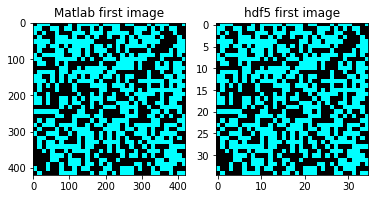

In [10]:
idx_img = 2
plt.figure()
plt.subplot(1,2,1).set_title('Matlab first image')
plt.imshow(first_img[...,idx_img])
plt.subplot(1,2,2).set_title('hdf5 first image')
plt.imshow(np.transpose(stim['checkerboard'][idx_img,...],(1,2,0)))
# plt.savefig('../figures/first_image_checkerboar.png')

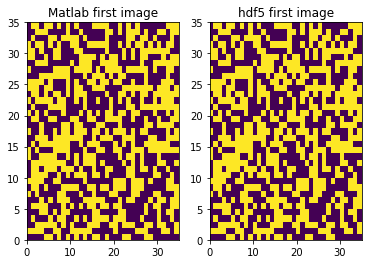

In [12]:
plt.figure()
plt.subplot(1,2,1).set_title('Matlab first image')
plt.pcolor(stim['checkerboard'][13951,1,...])
plt.subplot(1,2,2).set_title('hdf5 first image')
plt.pcolor(stim['checkerboard'][13952,1,...])
# plt.savefig('../figures/first_imag28232e_checkerboar.png')

In [13]:
stim.close()